## Business Understanding
Vaccination is one of humanity's most significant public health achievements, successfully eradicating or controlling numerous diseases. However, recent years have seen a troubling rise in vaccine skepticism, resulting in declining immunization rates and outbreaks of preventable diseases. Understanding the factors that contribute to vaccine hesitancy and predicting vaccination uptake is essential for public health officials and policymakers.

This project utilizes data from the National Flu Survey (NHFS 2009) to predict the likelihood of individuals receiving the H1N1 flu vaccine. By analyzing historical vaccination patterns, the study aims to provide insights into contemporary vaccination behaviors, particularly relevant in the context of emerging health crises such as the COVID-19 pandemic.


## Problem Statement
Vaccine hesitancy presents a significant challenge to public health initiatives, leading to lower immunization rates and heightened susceptibility to infectious diseases. Identifying the factors that influence individuals' decisions regarding vaccine uptake is crucial for developing effective interventions and fostering community immunity. This project seeks to predict the likelihood of individuals receiving the H1N1 flu vaccine through machine learning techniques applied to the National Flu Survey (NHFS 2009) dataset.

## Objectives
Prediction: Develop machine learning models to forecast individuals' H1N1 vaccine uptake based on demographic, socio-economic, and attitudinal factors.

Identify Influential Factors: Determine the key factors affecting H1N1 vaccine acceptance, such as healthcare provider recommendations, health insurance status, perceptions of vaccine efficacy, and risk assessments related to H1N1.

Model Evaluation: Assess the performance of various machine learning algorithms, including Decision Tree Classifier, Logistic Regression, Random Forest in predicting H1N1 vaccine uptake.

Impact Analysis: Analyze the implications of the predictive models and derive actionable insights for public health professionals and policymakers to enhance vaccination rates.

This structured approach aims to provide a comprehensive understanding of vaccination behaviors and inform strategies to combat vaccine hesitancy effectively.

##### Libraries
 provide essential tools for data preprocessing, algorithm implementation, and evaluation. They streamline the workflow, enhance model accuracy, and support efficient experimentation with various techniques.

In [1]:
# importing standard libraries
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learnig Libraries for Feature Engineering
from sklearn.preprocessing import  StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Libraries for splitting data into Train & Test
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Libraries for Baseline model & 2 classifications
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Libraries to measure performance
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report,  roc_auc_score
from sklearn.metrics import roc_curve, auc


# library used for model selection
from sklearn.model_selection import GridSearchCV

# Exploratory Data Analysis

In [2]:
#load the dataset for use

df = pd.read_csv("H1N1_Flu_Vaccines.csv")
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


## Data Undersatnding
In this section we are going to examine our data for better understanding before we start working on it. The section helps us 

ascertain the number of rows and columns(`.shape`)

.We also get a slight summary of the data displaying column names, number of non-null values and the Dtype of the column contents(`.info`)

When dealing with continous data, we can have a brief statistical summary of the columns with intergers or float data types(`.describe`)

Number of missing values in the dataframe (`.isnull().mean()*100`)

Number of duplicated values (`.duplicated().value_counts()`)

In [3]:
# Dimensions of the dataframe
df.shape

(26707, 38)

In [4]:
# display first 10 rows 
df.head(10)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0


In [5]:
# Display last 10  rows
df.tail(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
26697,26697,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Own,Not in Labor Force,kbazzjca,"MSA, Principle City",1.0,0.0,NaN,NaN,0,0
26698,26698,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,atmpeygn,"MSA, Not Principle City",1.0,1.0,dotnnunm,mxkfnird,0,1
26699,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,pxcmvdjn,xgwztkwe,0,0
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Not in Labor Force,lzgpxyit,"MSA, Principle City",1.0,0.0,NaN,NaN,0,1
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,Rent,Not in Labor Force,fpwskwrf,"MSA, Principle City",3.0,0.0,NaN,NaN,0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN,0,0


In [6]:
# summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [7]:
# columns in the dataframe
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [8]:
# Descriptive statistics of the dataframe
df.describe()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [9]:
# Percentage of missing values
df.isnull().mean()*100

respondent_id                   0.000000
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

In [10]:
# Number of duplicates
df.duplicated().value_counts()

False    26707
dtype: int64

In [11]:
# Count distinct observations
df.nunique()

respondent_id                  26707
h1n1_concern                       4
h1n1_knowledge                     3
behavioral_antiviral_meds          2
behavioral_avoidance               2
behavioral_face_mask               2
behavioral_wash_hands              2
behavioral_large_gatherings        2
behavioral_outside_home            2
behavioral_touch_face              2
doctor_recc_h1n1                   2
doctor_recc_seasonal               2
chronic_med_condition              2
child_under_6_months               2
health_worker                      2
health_insurance                   2
opinion_h1n1_vacc_effective        5
opinion_h1n1_risk                  5
opinion_h1n1_sick_from_vacc        5
opinion_seas_vacc_effective        5
opinion_seas_risk                  5
opinion_seas_sick_from_vacc        5
age_group                          5
education                          4
race                               4
sex                                2
income_poverty                     3
m

### Description of the datasource

The dataset utilized in this project comprises `38 columns and 26,707 rows`, sourced from Kaggle. This dataset originates from the National Flu Survey (NHFS) of 2009, a comprehensive survey conducted to understand public attitudes and behaviors regarding influenza vaccination, specifically targeting the H1N1 flu vaccine.

The dataset has `no duplicate values`.

`30 Columns have missing values`

### Choosing Target Variable

In [12]:
# The target (seasonal flu rate) is explored
df['seasonal_vaccine'].value_counts(normalize=True)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

In [13]:
# The percentage breakdown of the two classes in a possible target (H1N1 flu rate) is explored.
df['h1n1_vaccine'].value_counts(normalize=True)   # A class imbalance problem is observed.

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [14]:
#checking value counts
vaccine_counts_h1n1 = df['h1n1_vaccine'].value_counts()
vaccine_counts_seasonal = df['seasonal_vaccine'].value_counts()

print("Value Counts for h1n1_vaccine:\n", vaccine_counts_h1n1)
print("\nValue Counts for seasonal_vaccine:\n", vaccine_counts_seasonal)


Value Counts for h1n1_vaccine:
 0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

Value Counts for seasonal_vaccine:
 0    14272
1    12435
Name: seasonal_vaccine, dtype: int64


`21,033 respondents did not receive the H1N1 flu vaccine.`

`5,674 respondents received the H1N1 flu vaccine.`

`14,272 respondents did not receive the seasonal flu vaccine.`

`12,435 respondents received the seasonal flu vaccine.`

The value counts indicate that the distribution of respondents across the "seasonal_vaccine" classes is more balanced compared to the distribution across the "h1n1_vaccine" classes.

Choosing H1N1 as the target variable is justified by its greater public health relevance, potential to generate actionable insights for future pandemics, and the unique challenges it presents for modeling vaccine uptake. It aligns with the goal of understanding vaccination behavior in crisis contexts, which has broader applications beyond routine immunization.

## Data Cleaning
Modify the Data Frame in some manner to correct erroneous data, remove redundancies;

-Drop columns based on relevance & missing values

-Fill/Drop missing vallues

#### Dropping columns based on relevance to `H1N1`

In [15]:
df.drop(columns=['respondent_id', 'employment_industry', 'employment_occupation', 'hhs_geo_region', 'census_msa', 'seasonal_vaccine'], inplace=True)
df.shape

(26707, 32)

#### Filling missing values
-Numeric Data types **object/float**  :**`MEAN`** - for continuous data, **`MEDIAN`** - for skewed distribution.

-Categorical Data types **object** : **`MODE`**


In [16]:
# Apply median imputation
median_columns = ['household_children', 'household_adults']


# Apply mode imputation
mode_columns = [
    'income_poverty', 'marital_status', 'education',
    'rent_or_own', 'employment_status', 'behavioral_antiviral_meds',
    'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
    'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face',
    'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition',
    'child_under_6_months', 'health_worker', 'health_insurance'
]

# Apply mean imputation
mean_columns = [
    'h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
    'opinion_seas_risk', 'opinion_seas_sick_from_vacc'
]

# Impute missing values
for col in median_columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in mode_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in mean_columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [17]:
# All missing values have been filled
df.isnull().mean()*100

h1n1_concern                   0.0
h1n1_knowledge                 0.0
behavioral_antiviral_meds      0.0
behavioral_avoidance           0.0
behavioral_face_mask           0.0
behavioral_wash_hands          0.0
behavioral_large_gatherings    0.0
behavioral_outside_home        0.0
behavioral_touch_face          0.0
doctor_recc_h1n1               0.0
doctor_recc_seasonal           0.0
chronic_med_condition          0.0
child_under_6_months           0.0
health_worker                  0.0
health_insurance               0.0
opinion_h1n1_vacc_effective    0.0
opinion_h1n1_risk              0.0
opinion_h1n1_sick_from_vacc    0.0
opinion_seas_vacc_effective    0.0
opinion_seas_risk              0.0
opinion_seas_sick_from_vacc    0.0
age_group                      0.0
education                      0.0
race                           0.0
sex                            0.0
income_poverty                 0.0
marital_status                 0.0
rent_or_own                    0.0
employment_status   

## Identify factors that Promote H1N1 Vaccine
Understand Target Variable Trends: provide a shared understanding for stakeholders and collaborators.

They can clarify data challenges and inform strategic decisions.

In [18]:
#create a cpoy of the dataframe
df2 = df.copy()

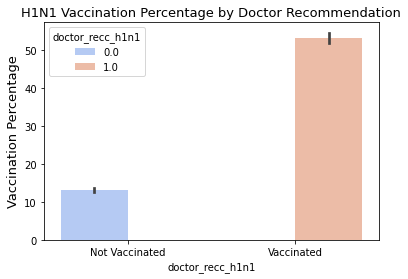

In [19]:
# A graph is created to visualize the relationship between H1N1 vaccination and doctor recommendation
dr = sns.barplot(x=df2['doctor_recc_h1n1'].dropna(), y=df2['h1n1_vaccine']*100, hue=df2['doctor_recc_h1n1'], palette='coolwarm')

# Set the tick positions on the x-axis
dr.set_xticks([0, 1])

# The x-axis tick labels are adjusted to 'Not Vaccinated' and 'Vaccinated'
dr.set_xticklabels(['Not Vaccinated', 'Vaccinated'])

# The y-axis label is set to 'Vaccination Percentage' with a font size of 13
dr.set_ylabel('Vaccination Percentage', fontsize=13)

# The title of the graph is set to 'H1N1 Vaccination Percentage by Doctor Recommendation' with a font size of 13
dr.set_title('H1N1 Vaccination Percentage by Doctor Recommendation', fontsize=13)

plt.show()


Doctor Recommendations was highly influential in H1N1 Vaccination intake

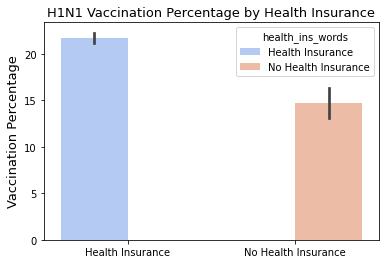

In [20]:
# A dictionary is created for mapping in order to generate better names for the x-axis in the graphs below  
ins_dict = {1: 'Health Insurance',
            0: 'No Health Insurance'}
# The column used to create clear x-axis tick marks in the graph below is created by replacing the health insurance words in 'df2' with the values from 'ins_dict'
df2['health_ins_words'] = df2['health_insurance'].replace(ins_dict)
# A bar plot is created to visualize the relationship between health insurance and H1N1 vaccination percentage
ins = sns.barplot(x=df2['health_ins_words'], y=df2['h1n1_vaccine']*100, hue=df2['health_ins_words'], palette='coolwarm')

# The x-axis label is set to empty
ins.set_xlabel('')

# The y-axis label is set to 'Vaccination Percentage' with a font size of 13
ins.set_ylabel('Vaccination Percentage', fontsize=13)

# The title of the plot is set to 'H1N1 Vaccination Percentage by Health Insurance' with a font size of 13
ins.set_title('H1N1 Vaccination Percentage by Health Insurance', fontsize=13)

plt.show()


Health Insuarance was a determining factor in H1N1 Vaccination

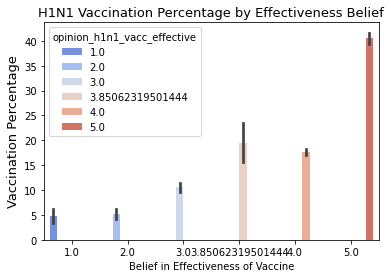

In [21]:
# A graph is created to show the differentiation in vaccine percentage depending on the opinion of effectiveness of H1N1 Vaccine
ins = sns.barplot(x=df2['opinion_h1n1_vacc_effective'].dropna(), y=df2['h1n1_vaccine']*100, hue=df2['opinion_h1n1_vacc_effective'], palette='coolwarm')

# The x-axis label is set to 'Belief in Effectiveness of Vaccine'
ins.set_xlabel('Belief in Effectiveness of Vaccine')

# The y-axis label is set to 'Vaccination Percentage'
ins.set_ylabel('Vaccination Percentage', fontsize=13)

# The title of the graph is set to 'H1N1 Vaccination Percentage by Effectiveness Belief'
ins.set_title('H1N1 Vaccination Percentage by Effectiveness Belief', fontsize=13)

plt.show()

Low Belief (1.0 and 2.0): The vaccination percentage is low, suggesting that individuals with minimal belief in the vaccine's effectiveness are less likely to get vaccinated.

Moderate Belief (3.0 to 4.0): There is a gradual increase in vaccination percentage, indicating that as belief strengthens, more individuals are vaccinated.

High Belief (5.0): The vaccination percentage peaks, showing that individuals with the highest belief in vaccine effectiveness are most likely to be vaccinated.

positive correlation between belief in the vaccine's effectiveness and the likelihood of vaccination. This suggests that perceived effectiveness is a strong influencing factor for vaccination decisions.

## Feature Engineering
**`1.Data Transformation`**-Converting the datatypes in our datasets to enable manipulation 

`OHE-One Hot Encoding`; process categorical data by transforming it into a numerical representation where each category is treated independently

**`2.Data Splitting`**- Separating the data into two sets `Test&Train`The training set is used to train machine learning models, while the testing set is kept separate to evaluate the model's performance on unseen data, ensuring that the model generalizes well to new, real-world data.

`Training Set: 21,365 samples with 40 features.`
`Testing Set: 5,342 samples with 40 features.`

In [22]:
# One-Hot Encoding for categorical features
# Identify columns
categorical_variables = df.select_dtypes(include = [object])
categorical_variables
variables_to_encode = categorical_variables.columns
df = pd.get_dummies(df,columns = variables_to_encode,drop_first = True,dtype = int)

In [23]:
# splitting Dataframe

# Define features and target
X = df.drop(columns=['h1n1_vaccine'])  # Replace with your target variable
y = df['h1n1_vaccine']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((21365, 40), (5342, 40), (21365,), (5342,))

## Data Modelling 
fiting a mathematical model to the data to accomplish a task, answer a question, or solve a specific problem.


#### Baseline Model
Simple model that serves as a reference point for evaluating the performance of more complex models. It's essentially the "minimum viable model" that provides a basic level of prediction accuracy.

`Logistic Regression ; statistical model for binary clasification.`

Logistic regression’s simplicity, efficiency, and interpretability make it an excellent baseline model. It helps establish a minimum standard of performance, providing a reference point to evaluate the gains from using more complex or specialized models.

In [24]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_log_reg)
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)

# Print the metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Optionally, print the classification report for a detailed breakdown
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

Accuracy: 83.60%
Precision: 0.68
Recall: 0.43
F1-score: 0.52

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4207
           1       0.68      0.43      0.52      1135

    accuracy                           0.84      5342
   macro avg       0.77      0.69      0.71      5342
weighted avg       0.82      0.84      0.82      5342



The results of the baseline model indicate its performance on a dataset that is imbalanced, with approximately 79% of the data belonging to class 0 and 21% belonging to class 1.

Class 0 (majority class):
Precision: 0.86, Recall: 0.95, F1-score: 0.90
The model performs exceptionally well for the majority class, as expected, due to the imbalance favoring this class.

Class 1 (minority class):
Precision: 0.68, Recall: 0.43, F1-score: 0.52
Performance is much poorer here, which is a common issue in imbalanced datasets.

Averages
Macro Average:
Gives equal weight to both classes, regardless of their size. It shows an overall view of the model's balanced performance (precision: 0.77, recall: 0.69, F1-score: 0.71), which highlights underperformance for the minority class.

Weighted Average:
Accounts for class imbalance by giving more weight to the majority class. The weighted averages for precision (0.82), recall (0.84), and F1-score (0.82) reflect the strong influence of class 0.

## Handling Class Imbalance


Handling class imbalance is vital because it ensures that machine learning models are not biased toward the majority class, can recognize and predict the minority class more accurately, and provide meaningful performance metrics. By addressing imbalance, models become more effective in domains where the minority class is of higher importance

`SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address the problem of imbalanced datasets, where one class (typically the minority class) has significantly fewer examples than the other (majority class)`

Improves Model Performance: It allows classifiers to learn better from the minority class and helps in making more accurate predictions.

No Information Loss: Unlike simple undersampling methods, SMOTE does not discard any data from the majority class, avoiding potential information loss.

In [25]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Check the class distribution
print("Class Distribution after SMOTE:", y_smote.value_counts())

# Train-Test Split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote
)

Class Distribution after SMOTE: 1    21033
0    21033
Name: h1n1_vaccine, dtype: int64


### Data Scaling
The process of standardizing or normalizing the range of independent variables or features of your data so that they have consistent scales. This ensures that all features contribute equally to the machine learning model and prevents features with larger ranges from dominating the model's training process.

ensures that synthetic data created by SMOTE is proportional and meaningful.


In [26]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_near_miss_scaled = scaler.fit_transform(X_train_smote)
X_test_near_miss_scaled = scaler.transform(X_test_smote)

##### Modelling after Over-Sampling & Scaling

In [27]:
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_smote, y_train_smote)  # Train on the resampled data

# Evaluate Logistic Regression
y_pred_log = log_model.predict(X_test_smote)  # Predict on the test set
print("Logistic Regression Classification Report:")
print(classification_report(y_test_smote, y_pred_log))  # Compare against y_test_near_miss
print("ROC AUC Score:", roc_auc_score(y_test_smote, log_model.predict_proba(X_test_smote)[:, 1]))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      4207
           1       0.80      0.78      0.79      4207

    accuracy                           0.80      8414
   macro avg       0.80      0.80      0.80      8414
weighted avg       0.80      0.80      0.80      8414

ROC AUC Score: 0.8723339862383143


C:\Users\Chris Noel\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Logistic Regresion

`For class 0 (no vaccine):
Precision: 0.79
Recall: 0.81
F1-Score: 0.80`

`For class 1 (vaccinated):
Precision: 0.80
Recall: 0.78
F1-Score: 0.79`


`Accuracy:
The overall accuracy is 80%, showing the model correctly predicts the class labels 8 out of 10 times.
ROC AUC Score:`

`The ROC AUC score of 0.872 indicates a high level of separability between the two classes. This metric suggests that the model can discriminate effectively between those who took the H1N1 vaccine and those who did not.`


### Desicion Tree Model
provide an effective method for making decisions because they lay out the problem and all the possible outcome

`Tuning & evaluating(train/test_accuracy);` critical for evaluating the impact of the tree depth on the performance of a Decision Tree model, particularly when dealing with imbalanced datasets processed with SMOTE. By tracking both training and testing accuracy, the code helps to identify the optimal tree depth where the model performs well on both training and unseen data, thus avoiding overfitting and underfitting

In [28]:
# Model Evaluation 
train_accuracy = []
test_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train_smote, y_train_smote)
    train_accuracy.append(dt_model.score(X_train_smote, y_train_smote))
    test_accuracy.append(dt_model.score(X_test_smote, y_test_smote))

In [29]:
#creating a structured DataFrame
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame.head(10)

,max_depth,train_acc,test_acc
0,1,0.730120,0.727003
1,2,0.758439,0.758022
2,3,0.765007,0.761231
3,4,0.792672,0.787972
4,5,0.805361,0.798550
5,6,0.820100,0.814119
6,7,0.834869,0.827430
7,8,0.841941,0.833611
8,9,0.853768,0.841811


the relationship between tree depth and the corresponding training and testing accuracies in tabular form.

the model is better able to fit the training data as the depth of the tree increases. The model is capturing more patterns in the training data, which is expected since deeper trees can make more detailed splits.

The test accuracy also improves with increasing depth, suggesting that the model is generalizing well to unseen data as the tree grows deeper, at least up to max_depth=9.

In [30]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=8, random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

# Evaluate Decision Tree
y_pred_dt = dt_model.predict(X_test_smote)
print("Decision Tree Classification Report:")
print(classification_report(y_test_smote, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test_smote, dt_model.predict_proba(X_test_smote)[:, 1]))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      4207
           1       0.85      0.81      0.83      4207

    accuracy                           0.83      8414
   macro avg       0.83      0.83      0.83      8414
weighted avg       0.83      0.83      0.83      8414

ROC AUC Score: 0.9047708413129013


`The ROC AUC score of 0.904 is a key metric that reflects how well the model can distinguish between the classes. This value (close to 1) indicates that the model has a high ability to separate vaccinated individuals from non-vaccinated ones.`

`The F1-scores for both classes are similar (`0.84 for class 0 and 0.83 for class 1`), showing that the model has learned to correctly classify both the vaccinated and non-vaccinated groups.`

`Class 0 (non-vaccinated):
Precision: 0.82, Recall: 0.86
Precision measures how many of the predicted non-vaccinated cases were actually non-vaccinated. Recall measures how many of the true non-vaccinated cases were correctly identified.`

`Class 1 (vaccinated):
Precision: 0.82, Recall: 0.86
Precision is the proportion of predicted vaccinated individuals that were actually vaccinated. Recall indicates how well the model identifies actual vaccinated individuals.`

`Overall Accuracy; accuracy of the model is 83%, meaning the model is correctly classifying 83% of the samples,`

`Weigted Average; the metrics is also 0.83, indicating that the model performs consistently well when accounting for the number of instances in each class.`

### Random Forest
ensemble learning algorithm used for classification and regression tasks. It builds multiple decision trees during training, and for prediction, it aggregates the results from all the trees (by majority voting for classification or averaging for regression), which helps improve accuracy and reduce overfitting.

In [31]:
# Random Forest with Hyperparameter Tuning
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='roc_auc', verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

# Best Random Forest Model
best_rf = grid_search.best_estimator_

# Evaluate Random Forest
y_pred_rf = best_rf.predict(X_test_smote)
print("Random Forest Classification Report:")
print(classification_report(y_test_smote, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test_smote, best_rf.predict_proba(X_test_smote)[:, 1]))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] max_depth=5, min_samples_split=2, n_estimators=50 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_split=2, n_estimators=50, total=   1.0s
[CV] max_depth=5, min_samples_split=2, n_estimators=50 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=5, min_samples_split=2, n_estimators=50, total=   1.1s
[CV] max_depth=5, min_samples_split=2, n_estimators=50 ...............
[CV]  max_depth=5, min_samples_split=2, n_estimators=50, total=   1.0s
[CV] max_depth=5, min_samples_split=2, n_estimators=100 ..............
[CV]  max_depth=5, min_samples_split=2, n_estimators=100, total=   1.8s
[CV] max_depth=5, min_samples_split=2, n_estimators=100 ..............
[CV]  max_depth=5, min_samples_split=2, n_estimators=100, total=   2.1s
[CV] max_depth=5, min_samples_split=2, n_estimators=100 ..............
[CV]  max_depth=5, min_samples_split=2, n_estimators=100, total=   2.0s
[CV] max_depth=5, min_samples_split=2, n_estimators=200 ..............
[CV]  max_depth=5, min_samples_split=2, n_estimators=200, total=   4.0s
[CV] max_depth=5, min_samples_split=2, n_estimators=200 ..............
[CV]  max_depth=5, min_samples_split=2, n_estimators=200, total=   3.2s
[CV] max_depth=5, min_samples_split=2, n_estimators=200 ..............
[

[CV]  max_depth=None, min_samples_split=2, n_estimators=100, total=   3.9s
[CV] max_depth=None, min_samples_split=2, n_estimators=200 ...........
[CV]  max_depth=None, min_samples_split=2, n_estimators=200, total=   9.1s
[CV] max_depth=None, min_samples_split=2, n_estimators=200 ...........
[CV]  max_depth=None, min_samples_split=2, n_estimators=200, total=   8.2s
[CV] max_depth=None, min_samples_split=2, n_estimators=200 ...........
[CV]  max_depth=None, min_samples_split=2, n_estimators=200, total=   8.0s
[CV] max_depth=None, min_samples_split=5, n_estimators=50 ............
[CV]  max_depth=None, min_samples_split=5, n_estimators=50, total=   2.0s
[CV] max_depth=None, min_samples_split=5, n_estimators=50 ............
[CV]  max_depth=None, min_samples_split=5, n_estimators=50, total=   1.8s
[CV] max_depth=None, min_samples_split=5, n_estimators=50 ............
[CV]  max_depth=None, min_samples_split=5, n_estimators=50, total=   1.7s
[CV] max_depth=None, min_samples_split=5, n_estimato

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  4.1min finished


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4207
           1       0.92      0.88      0.90      4207

    accuracy                           0.90      8414
   macro avg       0.90      0.90      0.90      8414
weighted avg       0.90      0.90      0.90      8414

ROC AUC Score: 0.9610116171961238


`Class 0 (Non-Vaccinated):
Precision: 0.88, Recall: 0.92, F1-Score: 0.90.
Precision: Of the cases predicted as non-vaccinated, 88% were correctly classified.
Recall: 92% of actual non-vaccinated cases were correctly identified.
F1-Score: The F1-score, a balance between precision and recall, is 0.90, indicating that the model is performing well in classifying non-vaccinated individuals.`

`Class 1 (Vaccinated):
Precision: 0.92, Recall: 0.88, F1-Score: 0.90.
Precision: 92% of the individuals predicted to be vaccinated are indeed vaccinated.
Recall: 88% of actual vaccinated individuals are correctly identified.
The F1-score here is also 0.90, which indicates a balanced performance for the vaccinated`

`ROC AUC Score: 0.961: This is a very high value, indicating that the model has a strong ability to distinguish between the two classes (vaccinated vs non-vaccinated). The closer the ROC AUC score is to 1, the better the model is at separating the classes. A score of 0.961 suggests that the Random Forest model is doing an excellent job at distinguishing between individuals who are vaccinated and those who are not.`


### ROC-Receiver Operating Characteristics
used to assess the overall diagnostic performance of a test and to compare the performance of two or more diagnostic tests

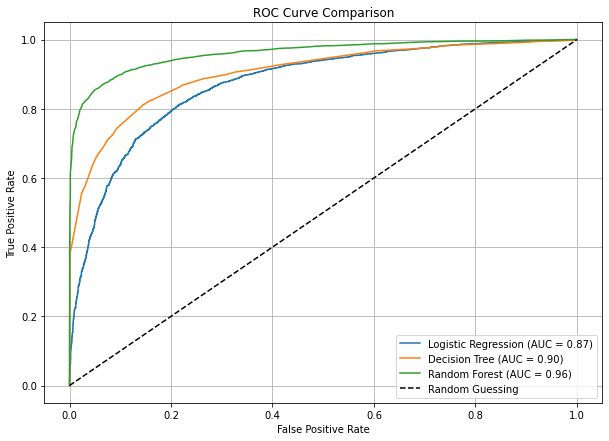

In [32]:
# # Function to plot ROC curve
def plot_roc_curve(models, X_test_smote, y_test_smote, model_names):
    plt.figure(figsize=(10, 7))
    for model, name in zip(models, model_names):
        y_probs = model.predict_proba(X_test_smote)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_smote, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.title('ROC Curve Comparison')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Plot ROC curves for all models
models = [log_model, dt_model, best_rf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
plot_roc_curve(models, X_test_smote, y_test_smote, model_names)


Logistic Regression (AUC = 0.87):
A reasonably strong classifier.
It performs well but is not the best compared to the other two models.
It may slightly underperform in scenarios requiring higher precision or recall.

Decision Tree (AUC = 0.90):
Better than Logistic Regression.
Likely captures non-linear relationships in the data.
However, Decision Trees can overfit on training data, so this result might need validation on unseen data.

Random Forest (AUC = 0.96):
The best-performing model among the three.
High AUC indicates that it can distinguish between classes with high accuracy.
Random Forest's ensemble approach minimizes overfitting and improves generalization.

## Conclusions
In conclusion, the results of this analysis provide a strong foundation for stakeholders to make informed decisions regarding public health strategies aimed at increasing H1N1 vaccination rates. By leveraging the insights gained from the predictive models, stakeholders can enhance their efforts to combat vaccine hesitancy and improve community health outcomes.`i.e;`

`The implemented preprocessing and Random Forest model deliver a reliable and robust solution for predicting vaccine uptake.This high score indicates that the model is highly effective at distinguishing between individuals who received the H1N1 vaccine and those who did not. Its ensemble approach minimizes the risk of overfitting, making it a reliable choice for predicting vaccine uptake in real-world scenarios. Stakeholders can confidently use these insights to make data-driven decisions in public health strategies, resource allocation, and vaccine campaigns.`

`Long-Term Implications:
The ability to accurately predict vaccination uptake can significantly enhance public health responses, especially in the context of emerging health crises. By understanding the factors that drive vaccine acceptance, stakeholders can implement more 
effective public health campaigns that foster community trust and participation.`



## RECOMMENDATIONS
-Invest in Public Health Initiatives:
Support initiatives aimed at increasing public awareness and education about the importance of vaccinations. This can include funding campaigns that address vaccine hesitancy and misinformation, particularly in communities with low vaccination rates.

-Leverage Data-Driven Insights:
Utilize the predictive models developed in this project to inform strategic decisions. By understanding the key factors influencing vaccine uptake, stakeholders can tailor their outreach and education efforts to target specific demographics that are less likely to vaccinate.

-Collaborate with Healthcare Providers:
Foster partnerships with healthcare providers to enhance the communication of vaccine benefits. The project highlights the significant impact of healthcare provider recommendations on vaccination rates. Shareholders should advocate for programs that encourage healthcare professionals to actively promote vaccinations.

-Focus on Health Insurance Accessibility:
Support policies and initiatives that improve access to health insurance, as the analysis indicates that individuals with health insurance are more likely to receive vaccinations. This could involve advocating for legislative changes or supporting organizations that work to expand health insurance coverage.

-Support Innovation in Vaccine Distribution and Accessibility
Insights from the study highlight socio-economic factors as critical to vaccine uptake. Shareholders could push for innovative distribution models, such as mobile vaccination clinics, partnerships with employers, and community-driven initiatives to make vaccines more accessible to underserved populations.